# Исследование успешности игр.

#### Описание проекта

Интернет магазин "Стримчик" продает игры по всему миру. Из открытых источников имеются данные о продажах на разных платформах до 2016 года, а также - оценки пользователей, жанры и платформа запуска игры, например Xbox или PlayStation. 

#### Цель проекта

Выявить определяющие успешность игры закономерности. Это позволит предсказать потенциально популярный продукт и спланировать рекламные кампании.

## Подготовка данных и изучение общей информации о датасете.

### Общая информация о датасете.

In [1]:
#подключаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.info()
'''
 я не делал отдельной проверки isnull(). Из df.info() посмотрел количество строк
 и в столбце Non-Null Count, разность этих значений это как раз количество пропусков в столбце
''' 
df.tail(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.0,67.0,tbd,E
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.0,61.0,5.8,T
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.0,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.00,0.0,48.0,tbd,E
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E


### Промежуточный вывод:

Выявленные ошибки в данных:
* название столбцов - все начинаются с большой буквы -> заменить на нижний регистр
- year_of_release - тип float
- critic_score -  тип float, преобразуем в int для удобства просмотра
- пропуски данных в столбцах name, year_of_realise, genre, critic_score, user_score, rating
- столбец user_score имеет тип данных object, что странно, значит присутствуют значения кроме Nan и числовых. Посмотрев с конца, обнаружено значение "tbd"

### Подготовка данных для анализа.

Приводим названия столбцов к нижнем регистру

In [3]:
df.columns = df.columns.str.lower()

В столбце name пропущено два значения, заполнить их мы не можем. Удалим.

In [4]:
df = df.dropna(subset=['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


~~В столбце **year_of_release** хотелось бы заменить тип на int, но у нас есть пропуски, которые, в целом, можно заполнить вручную, но их много и это заняло бы много времени. Так как таких значений мало, скорее всего они не отобразятся на дальнейшем исследовании, оставим как есть.~~

Так как в столбце **year_of_release** доля пропусков ~2%, то эти строчки мы можем спокойно удалить, также заменим тип данных с float на int.

In [5]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Перейдем к столбцу **user_score**. Для начала посмотрим уникальные значения и узнаем сколько из них имеют статус 'tbd'.

In [6]:
# смотрим уникальные значения
print(df['user_score'].unique())

# Посмотрим, сколько строк имеют статус 'tbd'
df[df['user_score'] == 'tbd'].count()

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


name               2376
platform           2376
year_of_release    2376
genre              2376
na_sales           2376
eu_sales           2376
jp_sales           2376
other_sales        2376
critic_score       1056
user_score         2376
rating             2326
dtype: int64

2424 таких значения. 'TBD' означает 'to be determined'. В нашем случае это означает, что у игры недостаточно оценок от игроков. Такое может быть, если игра вышла недавно или просто непопулярна. Также игра могла быть холодно принята целевой аудиторией.

По идее, tbd можно приравнять к NaN, поскольку в нашем контексте tbd означает отсутствие значения. 

In [7]:
# преобразуем tbd в NaN
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float')

Заполним пропуски user_score на -1, так как оценка "0" существует. Так же поступим с critic_score, чтобы не смешивать реальные оценки с заполненными значениями.

In [8]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

Почему столбец critic_score имеет пропуски - большой вопрос, на том же метакритике сейчас можно посмотреть оценки по старым играм вплоть до 1958 года. Возможно во времена сбора статистики игры считали чем-то "детским", как например, слово "геймер" долгое время носило оскорбительный характер. Поэтому оценки от критиков не было и значения пропущены.

В начале работы было выяснено, что в столбце жанра есть пропуски. Они находились в строках с пропущенным именем игры, поэтому оказались удалены. Проверка:

In [9]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

#### Попробуем обработать столбец рейтинга ESRB.

In [10]:
# сначала посмотрим, что вообще происходит в столбце
df['rating'].value_counts(), df['rating'].isna().sum()

(E       3921
 T       2905
 M       1536
 E10+    1393
 EC         8
 K-A        3
 RP         1
 AO         1
 Name: rating, dtype: int64,
 6676)

В таблице видно, что много есть игр которые вышли на разных платформах. Поэтому встречаются одинаковые имена, а игра одна и таже - значит и возрастной рейтинг должен быть один и тот же. Составим словарь имя-рейтинг **name_rating** и заполним в соостветствии с ним пропуски в столбце **rating**.

In [11]:
rating_name = df.set_index("name")['rating'].dropna().to_dict()
def rate(r):
    if pd.isna(r['rating']):
        return rating_name.get(r['name'])
    return r['rating']

df['rating'] = df.apply(rate, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           10185 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Было обнаружено всего ~400 повторок, не густо. Остальные пропуски заполнить невозможно.

Попробую сделать так, отдельный "рейтинг":

Дальше будет видно, в какую сторону думать.

In [12]:
df['rating'] = df['rating'].fillna('R')

 Проверим на дубликаты:

In [13]:
print(df.duplicated().sum())
# явных дубликатов нет

0


In [14]:
# Попробуем вычислить неявные дубликаты
df[df[ ['name', 'platform', 'year_of_release'] ].duplicated(keep=False)]
df.drop(labels=[16230], axis=0, inplace=True)

#### Создадим столбец с сумой продаж по всем регионам

In [15]:
df['sales_total'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Промежуточный вывод:

В ходе подготовки данных, было сделано следующее:

* Названия столбцов были приведены к нижнему регистру
- Удалены строки с пустыми значениями столбца name, их было две
- Столбец year_of_release преобразован в тип int, также были удалены все строки с пропусками в этом столбце.
- Пропуски, а также 'tbd' значения в столбцах с оценкой критиков и пользователей были заменены и заполнены значением -1, чтобы позже было проще делать фильтрацию.
- Значения рейтинга ESRB были обработаны двумя способами, первый состоял в поиске одинаковых игр в датасете и выставлении одинакого рейтинга для таких игр, второй способ - пустые значения были заменены значением 'R' для будующей фильтрации.
- Также были обработаны дубликаты, явных дубликатов в таблице не оказалось, зато удалось обнаружить неявные, такая строка была удалена.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды.

Text(0, 0.5, 'Количество выпущенных игр')

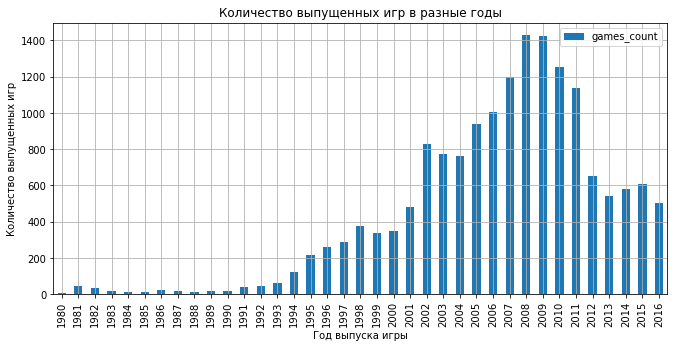

In [16]:
year_of_release_table = pd.pivot_table(df, index='year_of_release', values='name', aggfunc='count')
year_of_release_table.columns = ['games_count']
year_of_release_table.plot(kind = 'bar', figsize =(11,5),  grid = True)
plt.title('Количество выпущенных игр в разные годы')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр')

#### Промежуточный вывод

До 1994 года игр практически не выпускалось. В 1995 году выходит полноценная операционная система Windows 95, позже Windows 98 и в 2001 году выходит Windows XP. Разработчики начинают выпускать больше игр, пик которых наблюдается с 2008-2009 году. После, разработка и интерес к играм угасает, так как появляются первые смартфоны, начинают расти соц сети, и интересы людей меняются. Плюс, начал фин кризис, который сильно повлиял на разработку игр. Множество студий обанкротились.

### Проанализируем как менялись продажи по платформам.

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. А также выясниц: за какой характерный срок появляются новые и исчезают старые платформы?

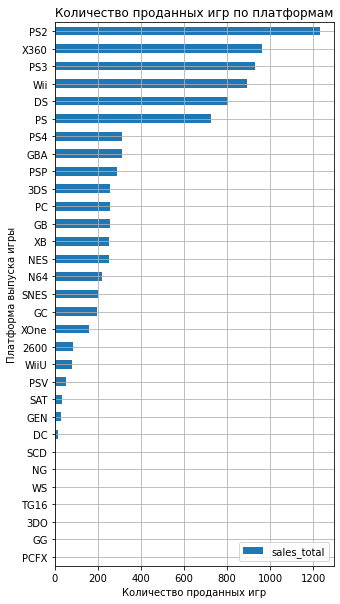

In [17]:
platform_sales = pd.pivot_table(df, index ='platform', values ='sales_total', aggfunc='sum')
platform_sales = platform_sales.sort_values('sales_total')
platform_sales.plot(kind = 'barh', figsize =(5,10), grid=True)
plt.title('Количество проданных игр по платформам')
plt.ylabel('Платформа выпуска игры')
plt.xlabel('Количество проданных игр')
plt.legend(loc='lower right')

Лидером является PS2, X360 отстает на 20% и идет нос к носу с PS3.

Выберем 6 платформ с наибольшим количеством проданных игр, на графике выше, по продажам они идут близко друг к другу, а между PS и GBA разница слишком велика.

Платформа  PS2
AxesSubplot(0.125,0.125;0.775x0.755)

Платформа  X360
AxesSubplot(0.125,0.125;0.775x0.755)

Платформа  PS3
AxesSubplot(0.125,0.125;0.775x0.755)

Платформа  Wii
AxesSubplot(0.125,0.125;0.775x0.755)

Платформа  DS
AxesSubplot(0.125,0.125;0.775x0.755)

Платформа  PS
AxesSubplot(0.125,0.125;0.775x0.755)



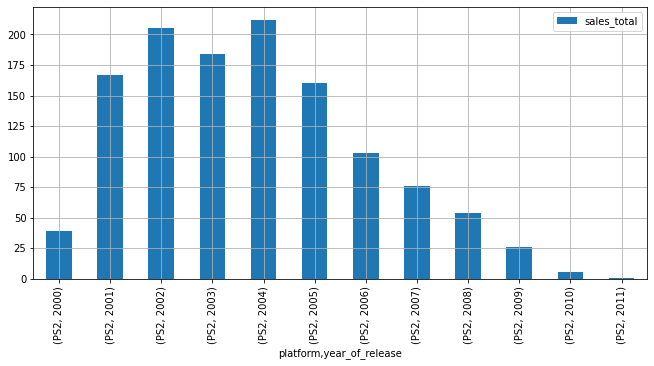

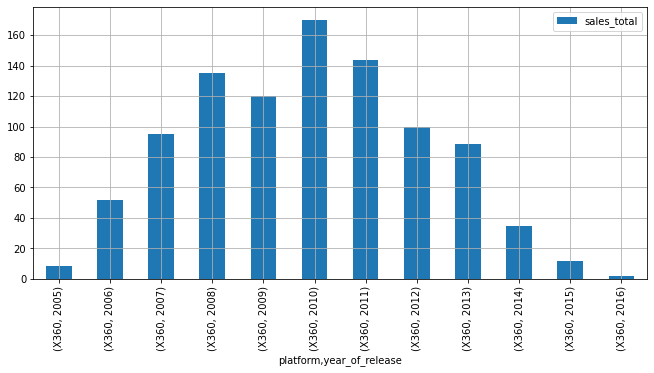

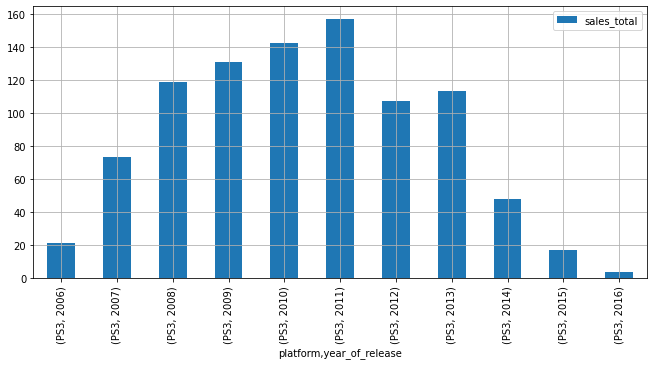

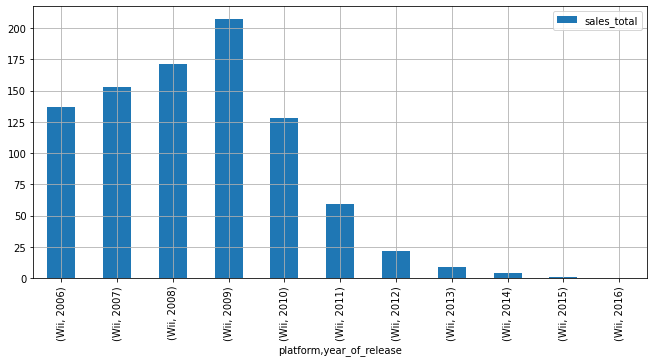

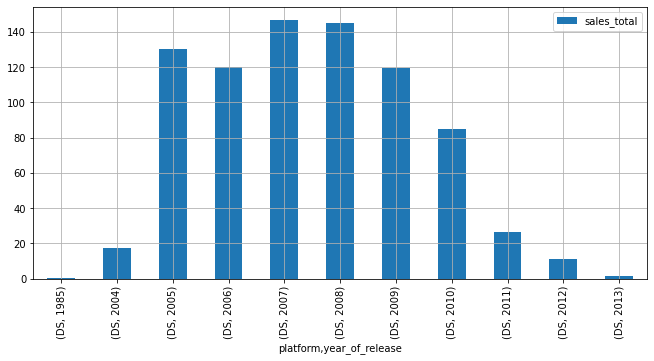

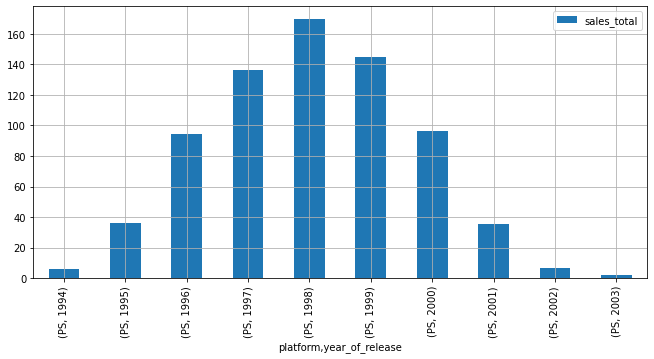

In [18]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for platform in top_platforms:
    print('Платформа ', platform)
    platform_sales_pivot_table = pd.pivot_table(df.query('platform == @platform'), index=['platform','year_of_release'], values='sales_total', aggfunc='sum')
    print(platform_sales_pivot_table.plot(kind = 'bar', figsize =(11,5), grid=True))
    print()

Платформа  PS2


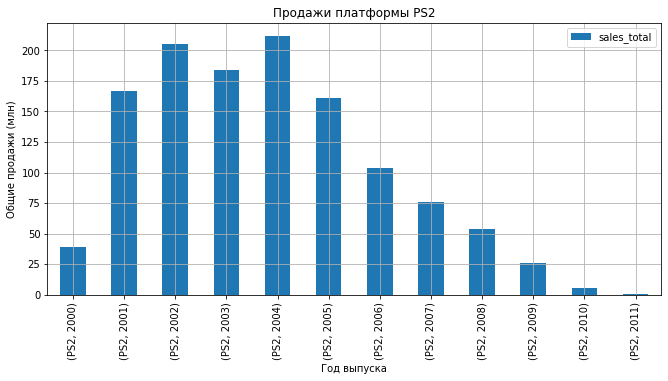

Платформа  X360


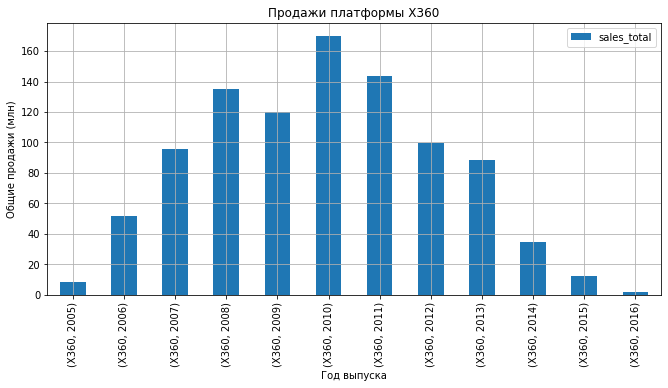

Платформа  PS3


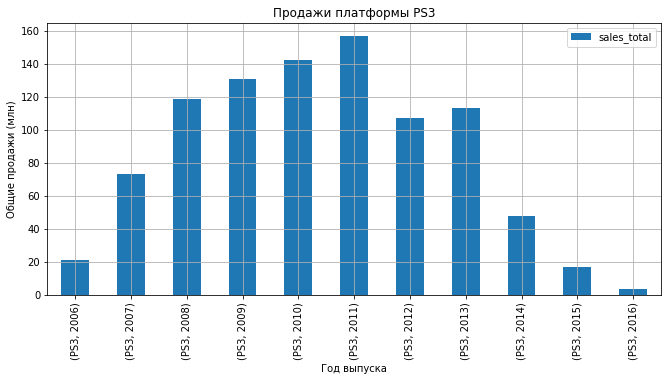

Платформа  Wii


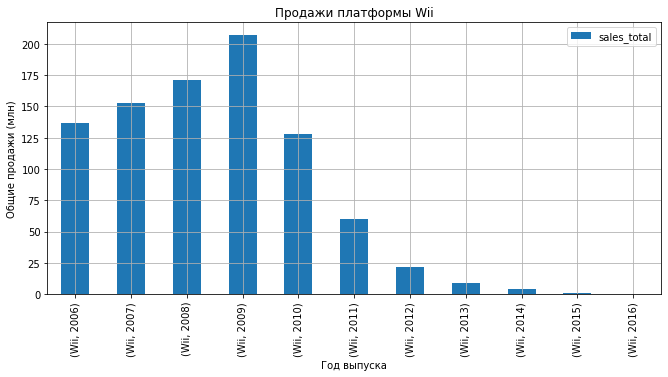

Платформа  DS


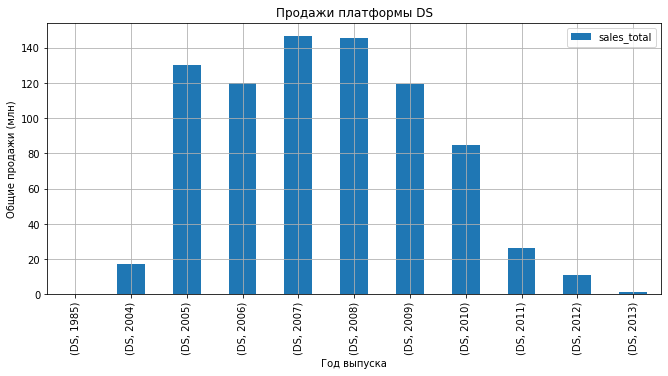

Платформа  PS


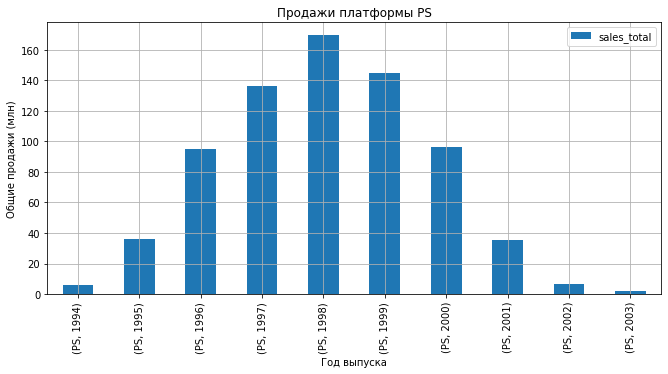

In [19]:
# Код ревьюера

top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

for platform in top_platforms:
    print('Платформа ', platform)
    
    # Создаем сводную таблицу
    platform_sales_pivot_table = pd.pivot_table(
        df.query('platform == @platform'), 
        index=['platform', 'year_of_release'], 
        values='sales_total', 
        aggfunc='sum'
    )
    
    # Строим график
    ax = platform_sales_pivot_table.plot(kind='bar', figsize=(11, 5), grid=True)
    
    # Подписи графика
    ax.set_title(f"Продажи платформы {platform}")  # Заголовок графика
    ax.set_xlabel("Год выпуска")  # Подпись оси X
    ax.set_ylabel("Общие продажи (млн)")  # Подпись оси Y
    
    
    plt.show()

#### Промежуточный вывод

Опишем сроки жизни игровых станций исходя из графиков:
* PS2 - с 2000 до 2011 года. Будем считать, что прожила 11 лет, не смотря на околонулевое значение в 2011. В 2006 количество продаж падает из-за выхода ps3
- X360 - с 2005 по 2016, также примерно 11 лет.
- PS3 - c 2006 по 2016, 10 лет
- Wii - c 2006 по 2016, 10 лет, хотя после 2010 продажи сильно упали.
- DS - не смотря на выход в 1985, данных до 2004 года нет, или данные не собирались, или платформа не использовалась для игр, стала популярна с 2004 по 2013, 8-9 лет жизни.
- PS c 1994 по 2003, 9 лет.

Суммируя, можно предположить, что среднее время жизни консоли - около 10 лет. Значит, будем считать актуальным периодом - время жизни консоли. Таким образом, чтобы построить прогноз на 2017, требуется взять данные с 2006 по 2016.

In [20]:
# поменял год с 2006 на 2012, получается, у нас 4 полных года, этого должно быть достаточно
actual_game_sales = df.query('year_of_release > 2012')
actual_game_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  sales_total      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


In [21]:
actual_game_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,R,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,R,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Определим самые прибыльные платформы за актуальный период.

In [22]:
best_sales = pd.pivot_table(actual_game_sales, index=['platform','year_of_release'], values='sales_total', aggfunc = 'sum')
# у меня не хотел весь датафрейм отражаться, поэтому пришлось сделать костыль
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(best_sales)

                          sales_total
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      201

Топ продаж по платформам на 2016 год возглавляют: PS4, Xone, 3DS. Причем, исходя из данных, количество продаж игр, выпущенных на каждую из этих платформ, снижается. Таким образом, можно сказать, что весь рынок игр падает.

Построим график «ящик с усами» по глобальным продажам игр без разбивки по платформам.

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: sales_total, dtype: float64

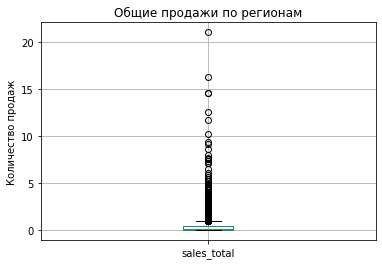

In [23]:
actual_game_sales.boxplot(column = 'sales_total')
plt.title("Общие продажи по регионам")
plt.ylabel('Количество продаж')
actual_game_sales['sales_total'].describe()

Text(0, 0.5, 'Количество продаж')

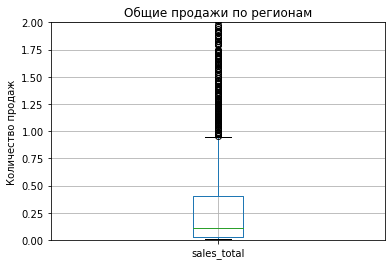

In [24]:
#На графике совершенно ничего не понятно, приблизим 
ax = actual_game_sales.boxplot(column = 'sales_total')
ax.set_ylim(0,2)
plt.title("Общие продажи по регионам")
plt.ylabel('Количество продаж')

В среднем продажи игры составляют до 0.9 млн долларов, при медиане 0.14млн, маловато.

А теперь построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Text(0, 0.5, 'Количество продаж')

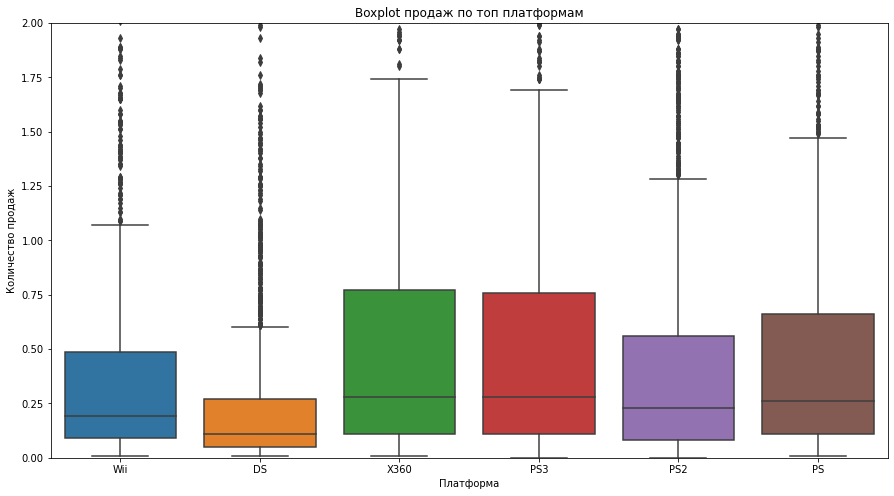

In [25]:
top_platforms_sales = df.query('platform==@top_platforms')
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='platform', y='sales_total', data=top_platforms_sales)
#сразу сделал приближение
ax.set_ylim(0,2)
plt.title('Boxplot продаж по топ платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')

Медиана по топовым платформам варьируется от 0,1 до 0,25 млн долларов прибыли за игру.
Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS3 и X360 - на уровне 1,7 млн долларов.
У остальных - от 0,7 до 1,5 миллионов долларов.
Среди всех выделяется Nintendo DS - у него эти показатели сильно ниже других, вероятно, к 2013-2016 году приставка уже изжила себя. Медиана  ~0,1 миллиона долларов, верхняя граница - 0,6 - 0.7 млн.

Теперь изучим влияние отзывов от критиков и пользователей на продажи и построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

0.11418661214018049

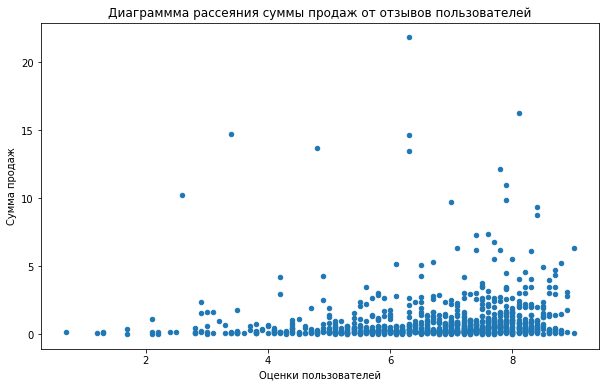

In [26]:
# начнем с отзывов пользователей
games_x360 = df.query('platform=="X360" & user_score > 0')
games_x360.plot(kind='scatter', x='user_score', y='sales_total', figsize=(10,6))
plt.title('Диаграммма рассеяния суммы продаж от отзывов пользователей')
plt.xlabel("Оценки пользователей")
plt.ylabel("Сумма продаж")
# Посчитаем корреляцию
games_x360['sales_total'].corr(games_x360['user_score'])

Судя по графику, зависимость есть, продажи растут вместе с ростом оценки пользователей. Вероятно, корреляция мала, так как присутствуют выбросы.

Теперь посмотрим отзывы критиков.

0.3928658925400695

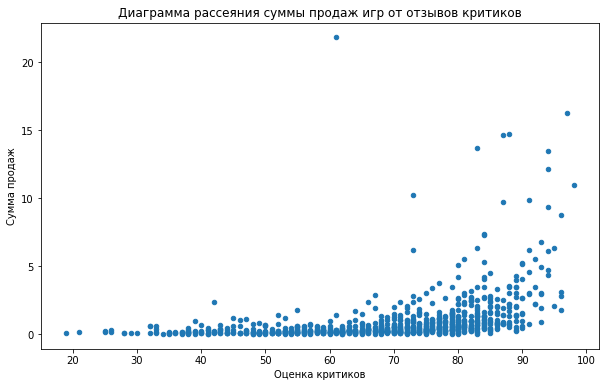

In [27]:
games_x360 = df.query('platform=="X360" & critic_score > 0')
games_x360.plot(kind='scatter', x='critic_score', y='sales_total', figsize=(10,6))
plt.title('Диаграмма рассеяния суммы продаж игр от отзывов критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж')
# Посчитаем корреляцию
games_x360['sales_total'].corr(games_x360['critic_score'])

Диаграмма с отзывами критиков показывает более сильное влияение на сумму продаж, чем оценки пользователей.

Графики выглядят похоже, можно сделать вывод, что от суммы продаж растет с оценками пользователей\критиков. Но корреляция опять говорит, что зависимости нет.

Теперь посмотрим, справедлив ли вывод для других платформ.

In [28]:

# Изначальный вариант через seaborn, heatmap
"""""
rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(11, 6))
count = 0
# Сделаем все графики на одном
for r in range(rows):
    for c in range(cols):
        next_pf = top_platforms[count]
        df_prep = df.query('platform == @next_pf & user_score > 0')
        
        df_filtered = df_prep[['sales_total' ,'critic_score', 'user_score']]
        sns.set(font_scale=0.5)
        ax = sns.heatmap(df_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), cmap="Blues", fmt='.2f', annot=True, cbar=False, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(next_pf, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1
"""""

'""\nrows, cols = 4, 2\nfig, axes = plt.subplots(rows, cols, figsize=(11, 6))\ncount = 0\n# Сделаем все графики на одном\nfor r in range(rows):\n    for c in range(cols):\n        next_pf = top_platforms[count]\n        df_prep = df.query(\'platform == @next_pf & user_score > 0\')\n        \n        df_filtered = df_prep[[\'sales_total\' ,\'critic_score\', \'user_score\']]\n        sns.set(font_scale=0.5)\n        ax = sns.heatmap(df_filtered.corr()[[\'sales_total\']].sort_values(by=\'sales_total\', ascending=False), cmap="Blues", fmt=\'.2f\', annot=True, cbar=False, annot_kws={\'size\':15}, ax=axes[r,c])\n        ax.set_title(next_pf, fontsize=20)\n        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)\n        plt.tight_layout(pad=3)\n        count += 1\n'

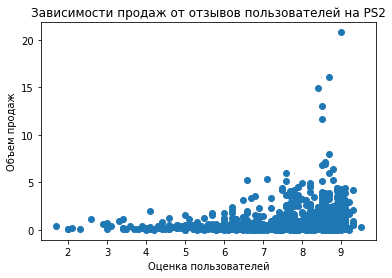

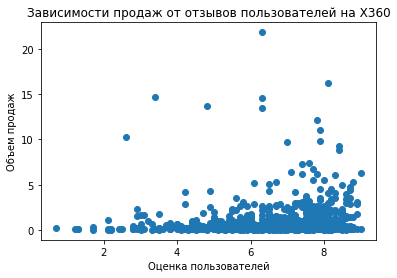

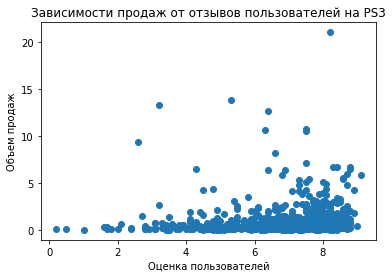

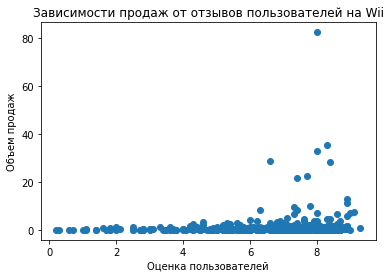

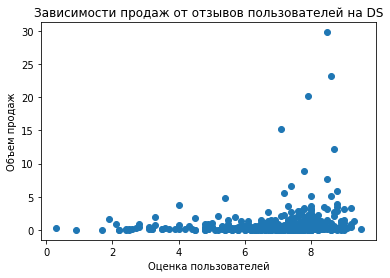

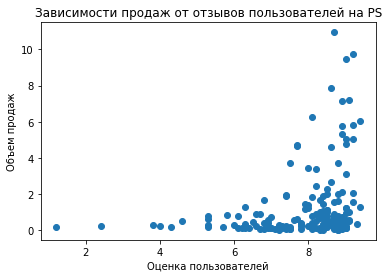

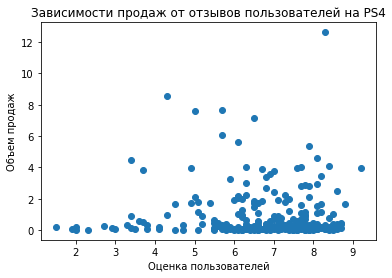

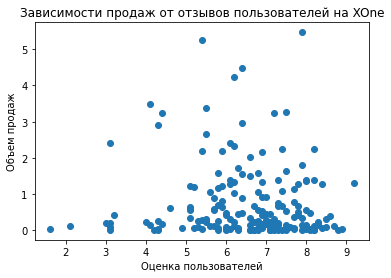

In [29]:
# Список топ платформ
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'XOne']

# Сначала пройдемся по отзывам пользователей
for p in top_platforms:
    df_filtered = df.query('platform == @p & user_score > 0')
    plt.figure()
    plt.scatter(df_filtered['user_score'], df_filtered['sales_total'])
    plt.title(f'Зависимости продаж от отзывов пользователей на {p}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Объем продаж')
    plt.show()

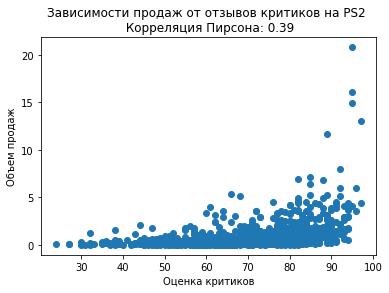

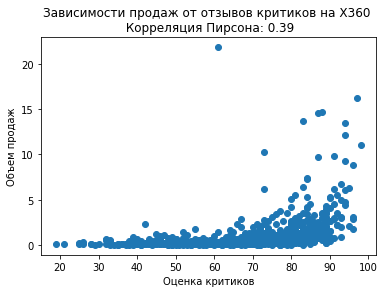

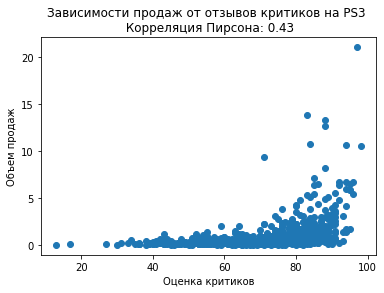

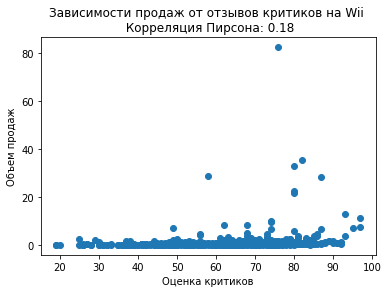

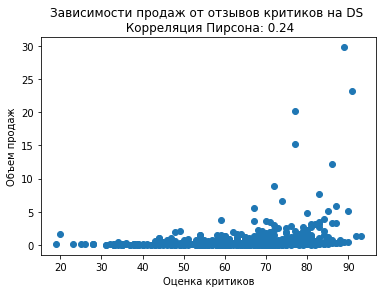

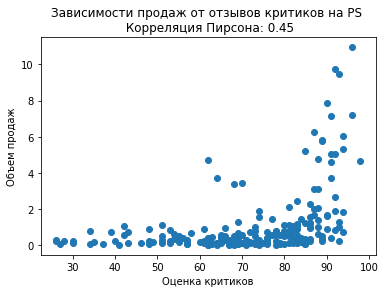

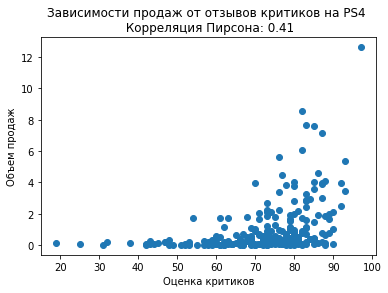

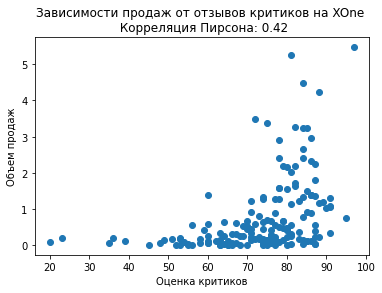

In [30]:
# Теперь посмотрим зависимость продаж от отзывов критиков
for p in top_platforms:
    # в двух строках ниже был столбец user_score вместо critic_score
    df_filtered = actual_game_sales.query('platform == @p & critic_score > 0')
    correlation = df_filtered['critic_score'].corr(df_filtered['sales_total'])
    
    plt.figure()
    plt.scatter(df_filtered['critic_score'], df_filtered['sales_total'])
    plt.title(f'Зависимости продаж от отзывов критиков на {p} \n Корреляция Пирсона: {correlation:.2f}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Объем продаж')
    plt.show()
    

#### Вывод: 
На большинстве платформ, таких как PS2, X360, PS3, PS и XOne, данные по корреляции между выручкой и оценками критиков и пользователей более или менее совпадают с общими тенденциями. Влияние отзывов критиков на продажи слабое, но ближе к среднему, тогда как отзывы пользователей оказывают значительно меньшее воздействие, а в некоторых случаях оно практически отсутствует. Например, на PS4 отзывы пользователей вообще не влияют на продажи, а на Wii и DS влияние критиков крайне незначительно. На PSP, DS и PS2 можно отметить очень слабую зависимость продаж от отзывов пользователей. 

При этом выделяются платформы, такие как DS, PS4 и XOne, где оценка критиков сильнее влияет на конечную выручку, чем оценка пользователей. В случае с DS это может быть связано с тем, что приставка популярна в Азии, и далеко не все игроки участвовали в оценке игр. Что касается PS4 и XOne, то эти платформы относительно новые, и пользователи, возможно, ещё не успели "освоиться", поэтому качественных отзывов от них пока недостаточно. Таким образом, в целом зависимость продаж от отзывов критиков слабая, но ближе к средней, а от отзывов пользователей — значительно слабее, во многих случаях её почти нет.

Принял!

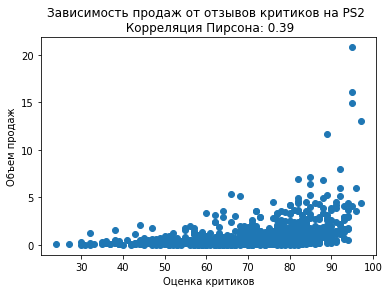

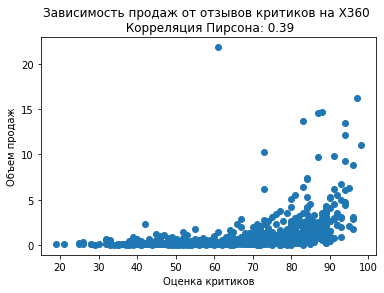

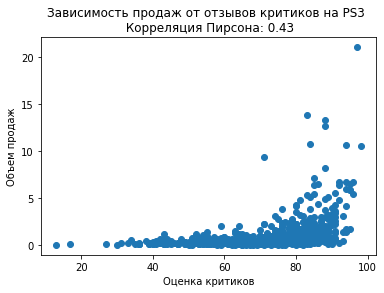

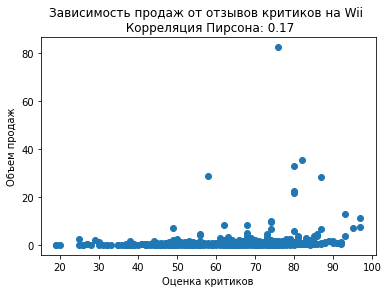

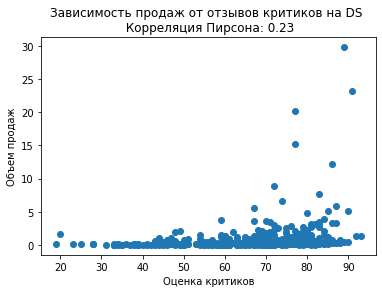

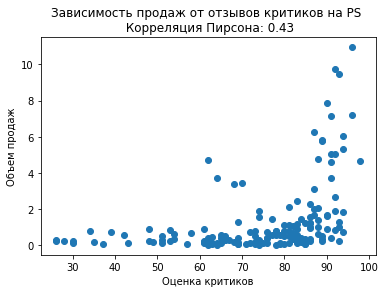

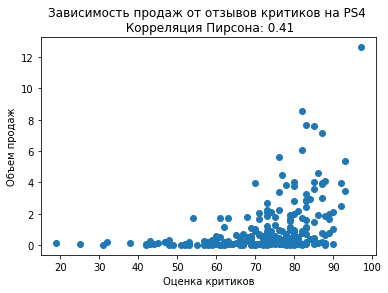

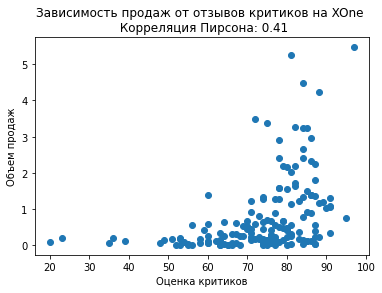

In [31]:
# Код ревьюера

# Исключаем строки с заполнением -1 (отсутствующие данные)
df['critic_score'] = df['critic_score'].replace(-1, np.nan)
df['user_score'] = df['user_score'].replace(-1, np.nan)

# Построение графиков для топовых платформ
for p in top_platforms:
    # Фильтрация данных
    df_filtered = df.query('platform == @p').dropna(subset=['critic_score', 'user_score'])
    
    # Расчёт корреляции
    correlation = df_filtered['critic_score'].corr(df_filtered['sales_total'])
    
    # Построение графика
    plt.figure()
    plt.scatter(df_filtered['critic_score'], df_filtered['sales_total'])
    plt.title(f'Зависимость продаж от отзывов критиков на {p} \n Корреляция Пирсона: {correlation:.2f}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Объем продаж')
    plt.show()

#### Распределение игр по жанрам.
Нарисуем столбчатую диаграмму с количеством и общей суммой продаж и расскажем о самых прибыльных жанрах, а потом посмотрим на особенности жанров с высокими и низкими продажами.

Text(0, 0.5, 'Количество\\сумма продаж')

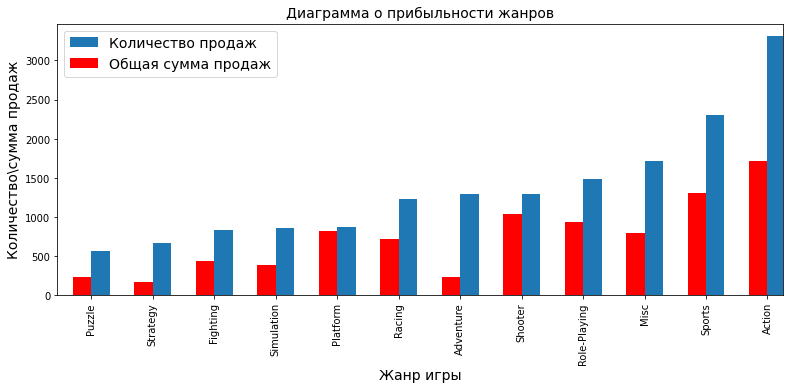

In [32]:
ax = plt.gca()

genre_table = df.groupby('genre').agg({'name': 'count', 'sales_total': 'sum'}).sort_values(by='name')

genre_table['name'].plot(kind='bar', figsize=(13,5), ax=ax, width=0.3, position=0)

genre_table['sales_total'].plot(kind='bar', figsize=(13,5), ax=ax, width=0.3, color='red', position=1)

ax.legend(['Количество продаж', 'Общая сумма продаж'], fontsize = 14)
plt.title('Диаграмма о прибыльности жанров', fontsize = 14)
plt.xlabel('Жанр игры', fontsize = 14)
plt.ylabel('Количество\сумма продаж', fontsize = 14)

Для более глубокого анализа продаж в зависимости от жанра, построим boxplot

Text(0, 0.5, 'Количество продаж, млн')

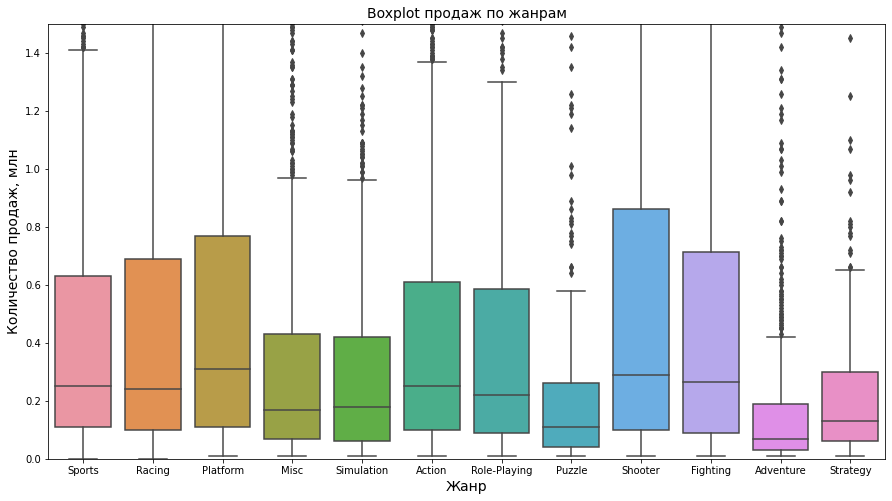

In [33]:
#top_platforms_sales = df.query('platform==@top_platforms')
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='genre', y='sales_total', data=top_platforms_sales)
#сразу сделал приближение и искючил выбросы
ax.set_ylim(0,1.5)
plt.title('Boxplot продаж по жанрам', fontsize=14)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Количество продаж, млн', fontsize=14)

#### Вывод v.1:

Больше всего продано игр в жанре Action. На втором месте игры в жанре спорт. А пазлы(скорее всего имеются ввиду игры, где нужно много думать) и стратегии находятся в конце списка, вероятно, для большинства игроков, они слишком сложные. По общей сумме продаж, можно сделать похожий вывод, но тут добавляется еще жанр "adventure". Вероятно, игры данного жанра были слабо распространены, поэтому общая сумма продаж мала. А игры жанра Action и Sport, наоборот, были и остаются на пике популярности, но требуют высокие затраты на производство, чем puzzle.

#### Вывод v.2:
На графике видно, что жанры : Action, Shooter, Platform имеют самые высокие медианные значения, то есть игры этих жанров чаще всего продаются в больших количествах. Напротив, жанры puzzle, strategy, adventure имеют более низкие медианные значения, что указывает на их меньшую популярность, по сравнению с играми других жанров. Стоит отметить, что жанры Action, Shooter имеют широкий разброс продаж, там есть игры как с очень плохими продажами, так и очень успешные. Жанры puzzle, strategy имеют более узкий разброс, то есть их продажи достаточно стабильны.

## Составление портрета пользователя по регионам

Определим для пользователя каждого региона (NA, EU, JP):

* Самые популярные платформы (топ-5), опишем различия в долях продаж;
- Самые популярные жанры (топ-5), поясним разницу;
- Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

Подготовим данные по каждому региону:

### Найдем самые популярные платформы.

In [34]:
na_actual_game_sales = actual_game_sales.query('na_sales > 0')
eu_actual_game_sales = actual_game_sales.query('eu_sales > 0')
jp_actual_game_sales = actual_game_sales.query('jp_sales > 0')

Теперь находим по каждому региону популярные платформы.

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


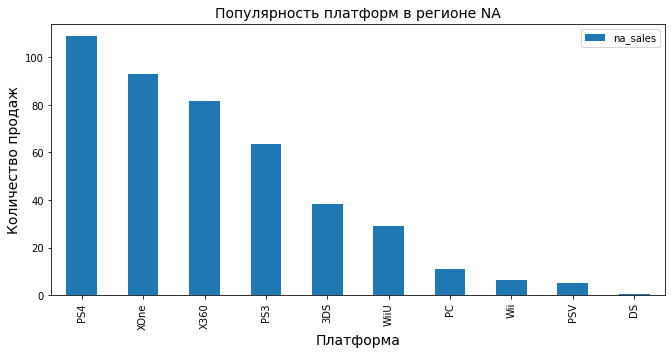

In [35]:
# NA регион (Северная Америка)
na_platform_table = pd.pivot_table(na_actual_game_sales, index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
na_platform_table.plot(kind='bar', figsize=(11,5))
plt.title('Популярность платформ в регионе NA', fontsize = 14)
plt.xlabel('Платформа', fontsize = 14)
plt.ylabel('Количество продаж', fontsize = 14)
na_platform_table

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


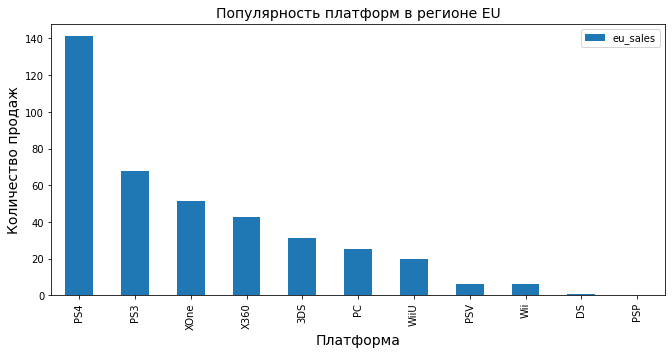

In [36]:
# EU регион (Европа)
eu_platform_table = pd.pivot_table(eu_actual_game_sales, index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_platform_table.plot(kind='bar', figsize=(11,5))
plt.title('Популярность платформ в регионе EU', fontsize = 14)
plt.xlabel('Платформа', fontsize = 14)
plt.ylabel('Количество продаж', fontsize = 14)
eu_platform_table

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


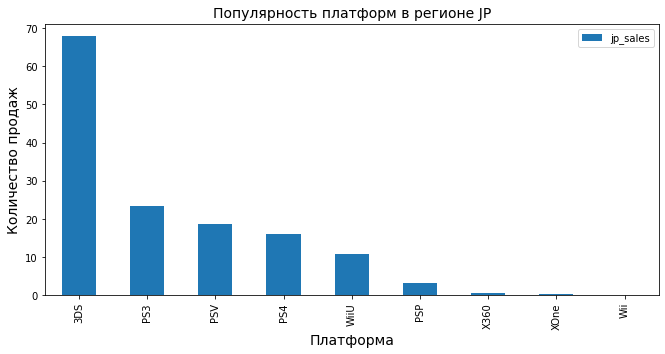

In [37]:
# JP регион (Япония)
jp_platform_table = pd.pivot_table(jp_actual_game_sales, index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_platform_table.plot(kind='bar', figsize=(11,5))
plt.title('Популярность платформ в регионе JP', fontsize = 14)
plt.xlabel('Платформа', fontsize = 14)
plt.ylabel('Количество продаж', fontsize = 14)
jp_platform_table

#### Вывод v.1:

В Северо-Американском регионе в топ5 консолей входили: X360, Wii, PS3, DS, PS4. К слову, XBOX до сих пор является самой популярной платформой в этом регионе. Компания Microsoft выпустила холодильник в виде Xone специально под этот рынок.

В Европе развернулась битва гиганов, PS3 и Xbox360 практически равны по популярности. Топ 3-4-5 занимают: Wii, PS4, DS. Европейский регион находится посередине между NA и JP регионом, отсюда такое смешение консолей.

Японский рынок, наоборот, показывает огромное влияние местных производителей консолей. В Топ5 входят: DS, 3DS, PS3, PSP, Wii.

#### Вывод v.2:
В Северо-Американском регионе в топ5 консолей входили:PS4, Xone, X360, PS3, 3DS.Примечательно, Xone не сильно отстает от PS4, учтем что игры обладают обратной совместимостью, сложив продажи у Sony и у Microsoft, сделаем вывод, что Xbox лидирует на NA рынке. К слову, XBOX до сих пор является самой популярной платформой в этом регионе. Компания Microsoft выпустила холодильник в виде Xone специально под этот рынок.

После корректировок, EU регион однозначно "принадлежит" Sony с PS4 и PS3, потом идут консоли Xbox, пятерку лидеров замыкает 3DS. Похоже, что к 2016 году иксбокс потерял приличную долю рынка.

Японский рынок, наоборот, показывает огромное влияние местных производителей консолей. В Топ5 входят: PS4, 3DS, PS3, PSV, WiiU. Продажи иностранных фирм крайне малы.

### Определим самые популярные жанры

Данные по регионам уже были получены, поэтому сразу построим сводные таблицы и выведем их на экран.

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


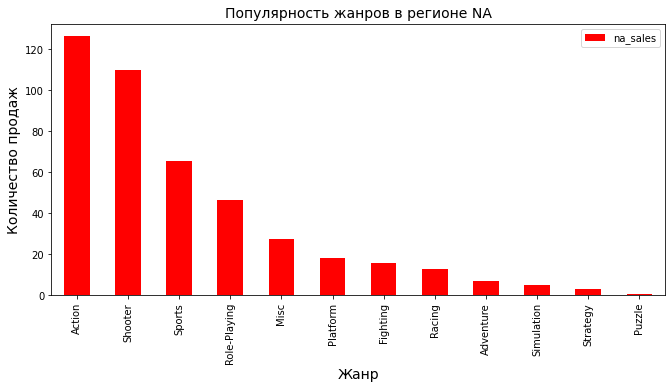

In [38]:
# NA регион
na_genre_table = pd.pivot_table(na_actual_game_sales, index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre_table.plot(kind='bar', figsize=(11,5), color='red')
plt.title('Популярность жанров в регионе NA', fontsize = 14)
plt.xlabel('Жанр', fontsize = 14)
plt.ylabel('Количество продаж', fontsize = 14)
na_genre_table

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


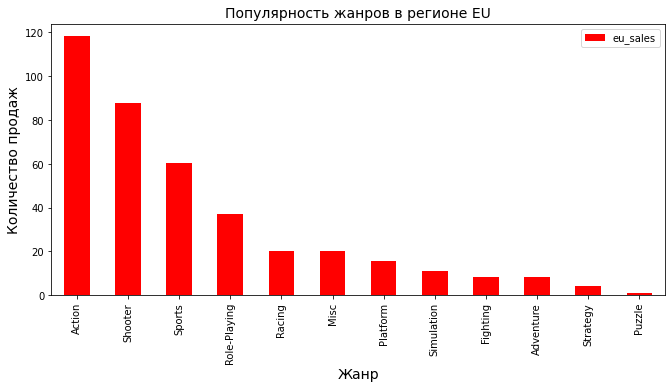

In [39]:
# EU регион
eu_genre_table = pd.pivot_table(eu_actual_game_sales, index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre_table.plot(kind='bar', figsize=(11,5), color='red')
plt.title('Популярность жанров в регионе EU', fontsize = 14)
plt.xlabel('Жанр', fontsize = 14)
plt.ylabel('Количество продаж', fontsize = 14)
eu_genre_table

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


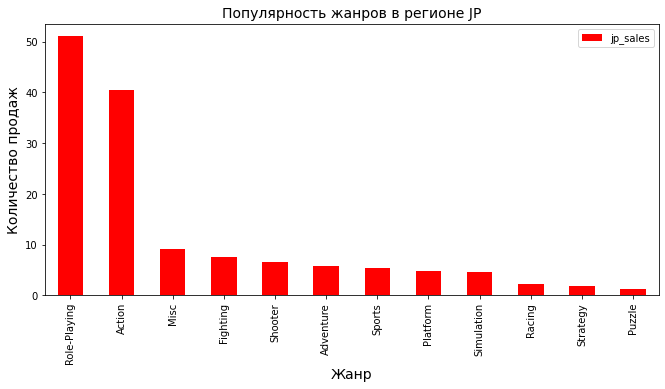

In [40]:
# JP регион
jp_genre_table = pd.pivot_table(jp_actual_game_sales, index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre_table.plot(kind='bar', figsize=(11,5), color='red')
plt.title('Популярность жанров в регионе JP', fontsize = 14)
plt.xlabel('Жанр', fontsize = 14)
plt.ylabel('Количество продаж', fontsize = 14)
jp_genre_table

#### Вывод:

* Топ 5 региона NA: Action, Shooter, Sports, Misc, Role-playing
- Топ 5 региона EU: Action, Shooter, Sports, Role-Playing и Racing
- Топ 5 региона JP: Role-Playing, Action, Misc, Sports, Adventure

Итак, можно сделать вывод, что Американские и Европейские игроки имеют схожие вкусы по жанрам там преобладают игры в жанре action, shooter и sports, тогда как Японский рынок возглавляют ролевые игры. Можно сказать, что игры в жанре action популярны во всех регионах.

### Как рейтинг ESRB влияет на каждый регион?

Действуем аналогично предыдущим двум пунктам.

,na_sales
rating,
M,172.82
E,81.66
R,74.82
E10+,56.43
T,51.98


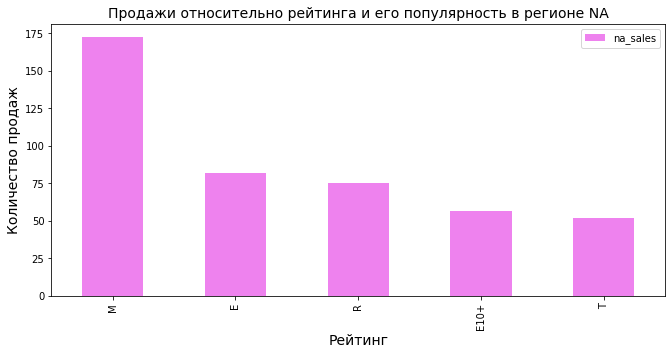

In [41]:
# NA
na_rating_table = pd.pivot_table(na_actual_game_sales, index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating_table.plot(kind='bar', figsize=(11,5), color='violet')
plt.title('Продажи относительно рейтинга и его популярность в регионе NA', fontsize = 14)
plt.xlabel('Рейтинг', fontsize = 14)
plt.ylabel('Количество продаж', fontsize = 14)
na_rating_table

,eu_sales
rating,
M,153.71
E,85.44
R,64.15
E10+,45.25
T,43.68


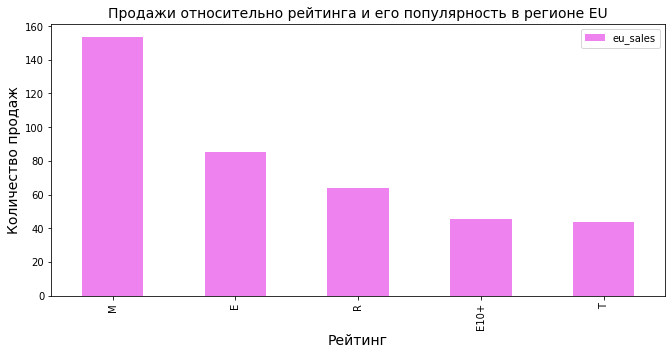

In [42]:
# EU
eu_rating_table = pd.pivot_table(eu_actual_game_sales, index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating_table.plot(kind='bar', figsize=(11,5), color='violet')
plt.title('Продажи относительно рейтинга и его популярность в регионе EU', fontsize = 14)
plt.xlabel('Рейтинг', fontsize = 14)
plt.ylabel('Количество продаж', fontsize = 14)
eu_rating_table

,jp_sales
rating,
R,80.97
T,22.84
E,15.98
M,14.72
E10+,6.27


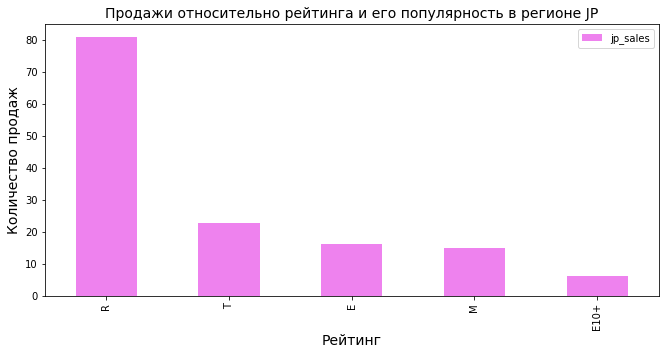

In [43]:
# JP
jp_rating_table = pd.pivot_table(jp_actual_game_sales, index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating_table.plot(kind='bar', figsize=(11,5), color='violet')
plt.title('Продажи относительно рейтинга и его популярность в регионе JP', fontsize = 14)
plt.xlabel('Рейтинг', fontsize = 14)
plt.ylabel('Количество продаж', fontsize = 14)
jp_rating_table

#### Вывод v1:

В Северной Америке и Европе картина одинаковая, рейтинг возглавляют игры с рейтингом Е, то есть "для всех возрастов", за ними идет рейтинг М - 17+, и тройку закрывает Т - игры для подростков.
В Японии ситуация отличается. На первом месте также игры с рейтингом "для всех", но после, с небольшим промежутком, идут игры уже для подростков. Похоже, что консоли в принципе в этом регионе более доступны, поэтому разработчики на целены на более молодую аудиторию.

#### Вывод v2:

В Северной Америке и Европе картина одинаковая, рейтинг возглавляют игры с рейтингом Е, то есть "для всех возрастов", за ними идет рейтинг М - 17+, и тройку закрывает R - рейтинг, которым мы заполнили пропуски. В Японии ситуация отличается. Неизвестный рейтинг R возглявляет топ с огромным отрывом, за ним идут тайтлы для подростков, а игры с рейтингом E, M разделяют третье место.

## Проверка гипотез

### Гипотеза 1

Средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые.

* Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [44]:
x_one_rate = actual_game_sales.query('platform == "XOne" & user_score > 0')['user_score']
pc_rate = actual_game_sales.query('platform == "PC" & user_score > 0')['user_score']
# проверим дисперсию на всякий случай(добавлено v.2)
print('Дисперсия XOne =', np.var(x_one_rate), '// Дисперсия PC =', \
      np.var(pc_rate))
# проводим т-тест, так как у нас имеются две независимые выборки, альтернативная гипотеза - двусторонняя
results = ttest_ind(x_one_rate,
                    pc_rate,
                    # добавлена строка в v.2
                    equal_var=False)
# уровень стат значимости
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
#это добавлено в v.2    
print(results)

Дисперсия XOne = 1.8965188383045526 // Дисперсия PC = 3.016306347554631
p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу
Ttest_indResult(statistic=1.45192815744488, pvalue=0.14759594013430463)


Таким образом будет верно следующее утверждение: средние пользовательские рейтинги платформ Xbox One и PC не отличаются между собой.

Посмотрим, действительно ли это так.

In [45]:
print(f'Средняя оценка пользователей игр для платформы Xbox One  - {x_one_rate.mean()}')
print(f'Средняя оценка пользователей игр для платформы PC - {pc_rate.mean()}')

Средняя оценка пользователей игр для платформы Xbox One  - 6.521428571428572
Средняя оценка пользователей игр для платформы PC - 6.2696774193548395


Компьютерные игры получают оценки статистически значимо ниже, чем игры для Xbox One.

### Гипотеза 2

* Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [46]:
action_rate = actual_game_sales.query('genre == "Action" & user_score > 0')['user_score']
pc_rate = actual_game_sales.query('genre == "Sports" & user_score > 0')['user_score']
results = ttest_ind(action_rate,
                    pc_rate)

# уровень стат значимости
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Таким образом, можно сказать, что средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [47]:
print(f'Средние пользовательские рейтинги жанров Action - {action_rate.mean()}')
print(f'Средние пользовательские рейтинги жанров Sports - {pc_rate.mean()}')

Средние пользовательские рейтинги жанров Action - 6.837532133676092
Средние пользовательские рейтинги жанров Sports - 5.238124999999999


## Общий вывод

#### В ходе предобработки:

* В столбце **name**  было удалено 2 строки, заполнить их невозможно.
- Столбец year_of_release - Осталось 146 пропусков, удалены, так как это меньше 5% от всех данных, также тип данных изменен float->int
- Столбец critic_score и user_score заполнены где это возможно.
- Столбец rating заполнено ~400 значений, остальные были заменены заглушкой.
- Явных дубликатов строк не выявлено, скрытые дубликаты были обработаны.
- По заданию был добавлен столбец sales с суммой всех продаж регионов.

#### В ходе исследовательского анализа было обнаружено:
До 1994 года активность в сфере компьютерных игр была низкой. Однако начиная с 1994 года наступает переломный момент: количество релизов игр резко увеличиваются, и индустрия переживает настоящий бум. К 2010 году тенденция меняется, и уже к 2012 году количество релизов сокращается вдвое, оставаясь на этом уровне вплоть до 2016 года. 

Срок активной жизни большинства платформ составляет 10 лет. Среди них выделяется платформа "PC" (персональные компьютеры), которая, хотя и не входит в топы по выручке, остаётся актуальной на протяжении всего времени.

Прогноз на 2017 год указывает на лидерство PS4 и XOne. Платформы PSV, Wii и 3DS также могут продолжать развиваться, но в меньших масштабах (приоритет стоит отдать Wii и 3DS, так как развитие PSV идёт слабо). Платформа PC требует поддержки, хотя и в меньших объёмах. 

Для большинства платформ наблюдаются схожие тенденции: зависимость продаж от отзывов критиков слабая, но ближе к средней, тогда как влияние отзывов пользователей значительно слабее, а в некоторых случаях практически отсутствует (очень слабая зависимость наблюдается на PSP, 3DS и PS2). Например, на PS4 отзывы пользователей не влияют на продажи, а на Wii и DS влияние критиков крайне незначительно. 

Что касается распределения игр по жанрам, то лидерами являются Action, Sports и Misc, а непопулярными — Puzzle, Strategy  и Fighting. В продажах по жанрам лидируют Action,  и Shooter , тогда как Strategy, Puzzle и Adventure занимают последние места, но их плюсом являются более стабильные продажи и оценки пользователей-критиков. Примечательно, что разница в продажах между жанром Action и  Strategy составляет 10 раз.

#### Были созданы портреты пользователей каждого региона

В Северо-Американском регионе в топ5 консолей входили:PS4, Xone, X360, PS3, 3DS.Примечательно, Xone не сильно отстает от PS4, учтем что игры обладают обратной совместимостью, сложив продажи у Sony и у Microsoft, сделаем вывод, что Xbox лидирует на NA рынке. К слову, XBOX до сих пор является самой популярной платформой в этом регионе. Компания Microsoft выпустила холодильник в виде Xone специально под этот рынок.

После корректировок, EU регион однозначно "принадлежит" Sony с PS4 и PS3, потом идут консоли Xbox, пятерку лидеров замыкает 3DS. Похоже, что к 2016 году иксбокс потерял приличную долю рынка.

Японский рынок, наоборот, показывает огромное влияние местных производителей консолей. В Топ5 входят: PS4, 3DS, PS3, PSV, WiiU. Продажи иностранных фирм крайне малы.н
 
* Топ 5 региона NA: Action, Shooter, Sports, Misc, Role-playing
- Топ 5 региона EU: Action, Shooter, Sports, Role-Playing и Racing
- Топ 5 региона JP: Role-Playing, Action, Misc, Sports, Adventure

Итак, можно сделать вывод, что Американские и Европейские игроки имеют схожие вкусы по жанрам там преобладают игры в жанре action, shooter и sports, тогда как Японский рынок возглавляют ролевые игры. Можно сказать, что игры в жанре action популярны во всех регионах.

Что касается рейтингов, ситуация обстоит так: в Северной Америке и Европе картина одинаковая, рейтинг возглавляют игры с рейтингом Е, то есть "для всех возрастов", за ними идет рейтинг М - 17+, и тройку закрывает R - рейтинг, которым мы заполнили пропуски. В Японии ситуация отличается. Игры с неизвестным рейтингом R возглявляет топ с огромным отрывом, за ним идут тайтлы для подростков, а игры с рейтингом E, M разделяют третье место. Похоже, что консоли в принципе в этом регионе более доступны, поэтому разработчики на целены на более молодую аудиторию.

#### Проверены следующие гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - гипотеза принята, с учетом доверительного интервала
Средние пользовательские рейтинги жанров Action и Sports разные - гипотеза подтверждена.


#### Что делать дальше?

Стоит сосредоточиться на современных платформах, таких как PS4, XOne и 3DS.
Важно предлагать популярные жанры, включая экшены, шутеры, спортивные и ролевые игры, так как они пользуются наибольшим спросом. Издателям с малым бюджетом следует сосредоточиться на играх в жанре puzzle и стратегиях, так как они более стабильны на рынке, велика вероятность, что точно принесут прибыль и позволят студии собрать хороших отзывов.  
Необходимо учитывать целевую аудиторию: большинство игр рассчитано на игроков в возрасте от 13 лет и старше.  
Также важно продолжать распространять компьютерные игры и портировать популярные игры с других платформ на PC, поскольку компьютеры остаются актуальными и конкурентоспособными в игровой индустрии.